## Multivariate Exploratory data analysis (EDA) - Manual

### By:
Jose R. Zapata

### Date:
2024-10-24

### Description:

Multivariate Exploratory data analysis (EDA) and description of the data set.

Data manipulation and visualization


## 📚 Import  libraries

In [24]:
# base libraries for data science
import sys
from pathlib import Path

import pandas as pd
import seaborn as sns

In [25]:
# configuration to show only 2 decimal places
pd.set_option("display.float_format", "{:.2f}".format)

In [26]:
# print library version for reproducibility

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.11.11 (main, Dec  6 2024, 20:02:44) [Clang 18.1.8 ]
Pandas version:  2.2.3


## 💾 Load data

The dataset has correct data types, fixed in:

`notebooks/2-exploration/01-jrz-data_explore_description-2024_03_01.ipynb`

In [27]:
DATA_DIR = Path.cwd().resolve().parents[1] / "data"

titanic_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/titanic_type_fixed.parquet", engine="pyarrow"
)

## 📊 Data description

### General data information

In [28]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  1309 non-null   int64   
 1   pclass      1309 non-null   int64   
 2   survived    1309 non-null   bool    
 3   name        1309 non-null   object  
 4   sex         1309 non-null   category
 5   age         1046 non-null   float64 
 6   sibsp       1309 non-null   int64   
 7   parch       1309 non-null   int64   
 8   fare        1308 non-null   float64 
 9   embarked    1307 non-null   category
dtypes: bool(1), category(2), float64(2), int64(4), object(1)
memory usage: 75.8+ KB


Ordinal data has to be converted again

information about the pclass column can be chech in the notebook

`notebooks/2-exploration/01-jrz-data_explore_description-2024_03_01.ipynb`

In [29]:
titanic_df["pclass"] = pd.Categorical(
    titanic_df["pclass"], categories=[3, 2, 1], ordered=True
)

# column Unnamed: 0 is not needed
titanic_df = titanic_df.drop(columns=["Unnamed: 0"])

General information about the data set:

In [30]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   category
 1   survived  1309 non-null   bool    
 2   name      1309 non-null   object  
 3   sex       1309 non-null   category
 4   age       1046 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   fare      1308 non-null   float64 
 8   embarked  1307 non-null   category
dtypes: bool(1), category(3), float64(2), int64(2), object(1)
memory usage: 56.8+ KB


In [31]:
# size of the dataframe
titanic_df.shape

(1309, 9)

In [32]:
# sample of the dataframe
titanic_df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
1176,3,False,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.55,S
581,2,False,"Watson, Mr. Ennis Hastings",male,NaN,0,0,0.00,S
18,1,True,"Bazzani, Miss. Albina",female,32.00,0,0,76.29,C
921,3,False,"Keefe, Mr. Arthur",male,NaN,0,0,7.25,S
494,2,True,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.00,1,1,37.00,C


Number of missing values

In [33]:
titanic_df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

Target Variable = `Survived`

#### General statistics of the data set

##### Numerical variables

In [34]:
titanic_df.describe()

,age,sibsp,parch,fare
count,1046.00,1309.00,1309.00,1308.00
mean,29.88,0.50,0.39,33.30
std,14.41,1.04,0.87,51.76
min,0.17,0.00,0.00,0.00
25%,21.00,0.00,0.00,7.90
50%,28.00,0.00,0.00,14.45
75%,39.00,1.00,0.00,31.27
max,80.00,8.00,9.00,512.33


##### Categorical variables

In [35]:
# categorical columns description
titanic_df.describe(include="category")

,pclass,sex,embarked
count,1309,1309,1307
unique,3,2,3
top,3,male,S
freq,709,843,914


### 📈  Multivariate Analysis

Is important to check the relationship between the target variable and multiple variables.

The target variable is `Survived`

#### Target vs age vs Sex

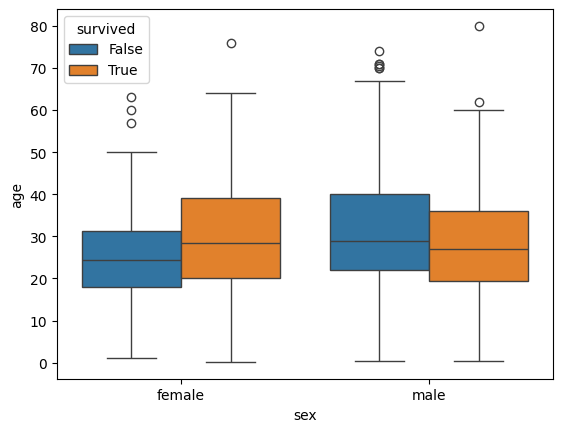

In [36]:
sns.boxplot(data=titanic_df, x="sex", y="age", hue="survived");

#### Target vs age vs pclass

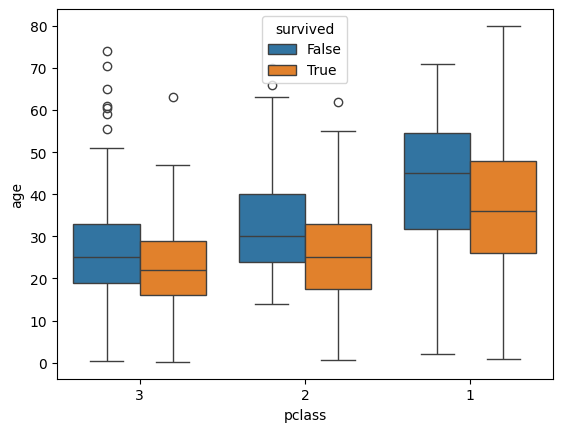

In [37]:
sns.boxplot(data=titanic_df, x="pclass", y="age", hue="survived");

#### Target vs age vs embarked

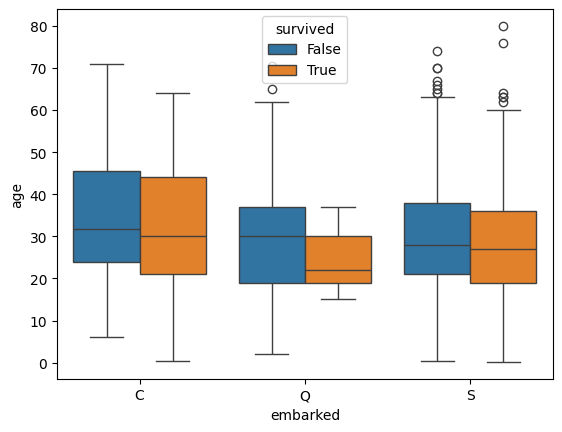

In [38]:
sns.boxplot(data=titanic_df, x="embarked", y="age", hue="survived");

#### Target vs sex vs pclass

In [39]:
(
    titanic_df[["sex", "pclass", "survived"]]
    .groupby(["pclass", "sex"], observed=True)
    .mean()
    * 100,
    1,
)

(               survived
 pclass sex             
 3      female     49.07
        male       15.21
 2      female     88.68
        male       14.62
 1      female     96.53
        male       34.08,
 1)

almost all Pclass 1 females survive and so do most of Pclass 2. Pclass 3 female survival is 50% and almost all (86%) Pclass 3 males unfortunately do not survive.

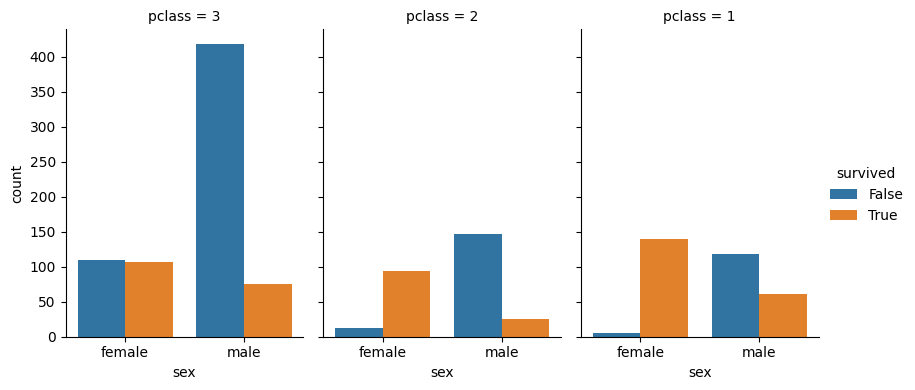

In [40]:
sns.catplot(
    data=titanic_df,
    x="sex",
    hue="survived",
    col="pclass",
    kind="count",
    height=4,
    aspect=0.7,
);

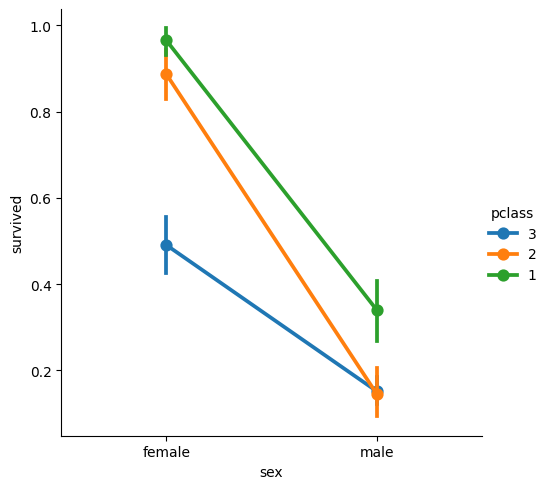

In [41]:
sns.catplot(data=titanic_df, x="sex", y="survived", hue="pclass", kind="point");

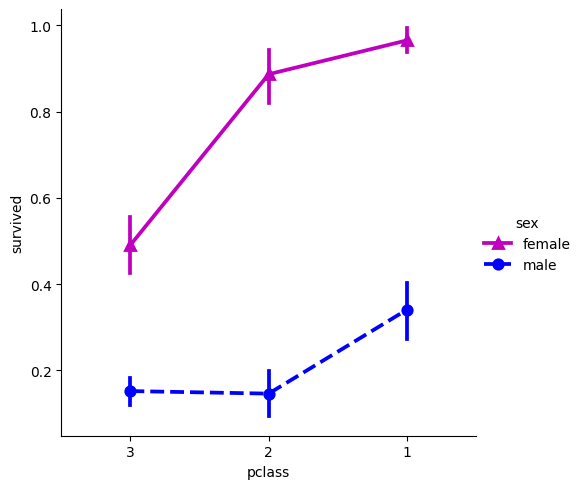

In [42]:
sns.catplot(
    data=titanic_df,
    x="pclass",
    y="survived",
    hue="sex",
    palette={"male": "b", "female": "m"},
    markers=["^", "o"],
    linestyles=["-", "--"],
    kind="point",
);

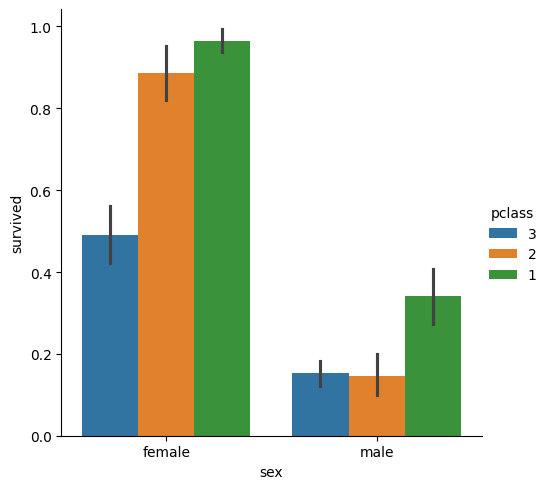

In [43]:
sns.catplot(data=titanic_df, x="sex", y="survived", hue="pclass", kind="bar");

#### Target vs pclass vs fare

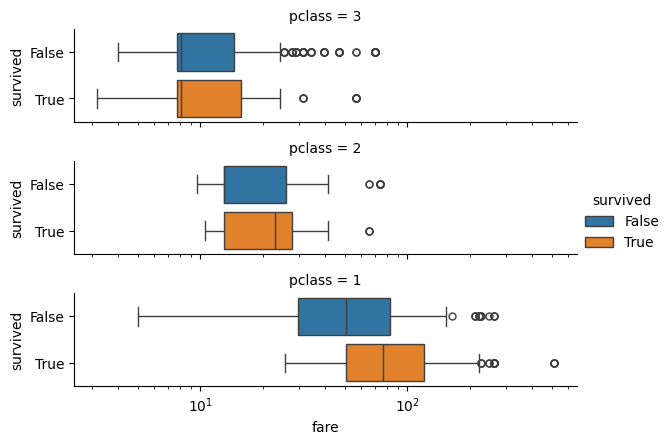

In [44]:
sns.catplot(
    x="fare",
    y="survived",
    row="pclass",
    kind="box",
    hue="survived",
    orient="h",
    height=1.5,
    aspect=4,
    data=titanic_df.query("fare > 0"),
).set(xscale="log");

#### Target vs sex vs pclass vs embarked

In [45]:
(
    titanic_df[["embarked", "sex", "pclass", "survived"]]
    .groupby(["embarked", "pclass", "sex"], observed=True)
    .agg(["count", "mean"])
)

survived     
                          count mean
embarked pclass sex                 
C        3      female       31 0.71
                male         70 0.21
         2      female       11 1.00
                male         17 0.29
         1      female       71 0.97
                male         70 0.40
Q        3      female       56 0.59
                male         57 0.12
         2      female        2 1.00
                male          5 0.00
         1      female        2 1.00
                male          1 0.00
S        3      female      129 0.40
                male        366 0.14
         2      female       93 0.87
                male        149 0.13
         1      female       69 0.96
                male        108 0.31

#### Numerical vs All Numerical Variables

In [46]:
# list of the numerical columns
numerical_columns = list(titanic_df.select_dtypes(include=["number"]).columns)
numerical_columns

['age', 'sibsp', 'parch', 'fare']

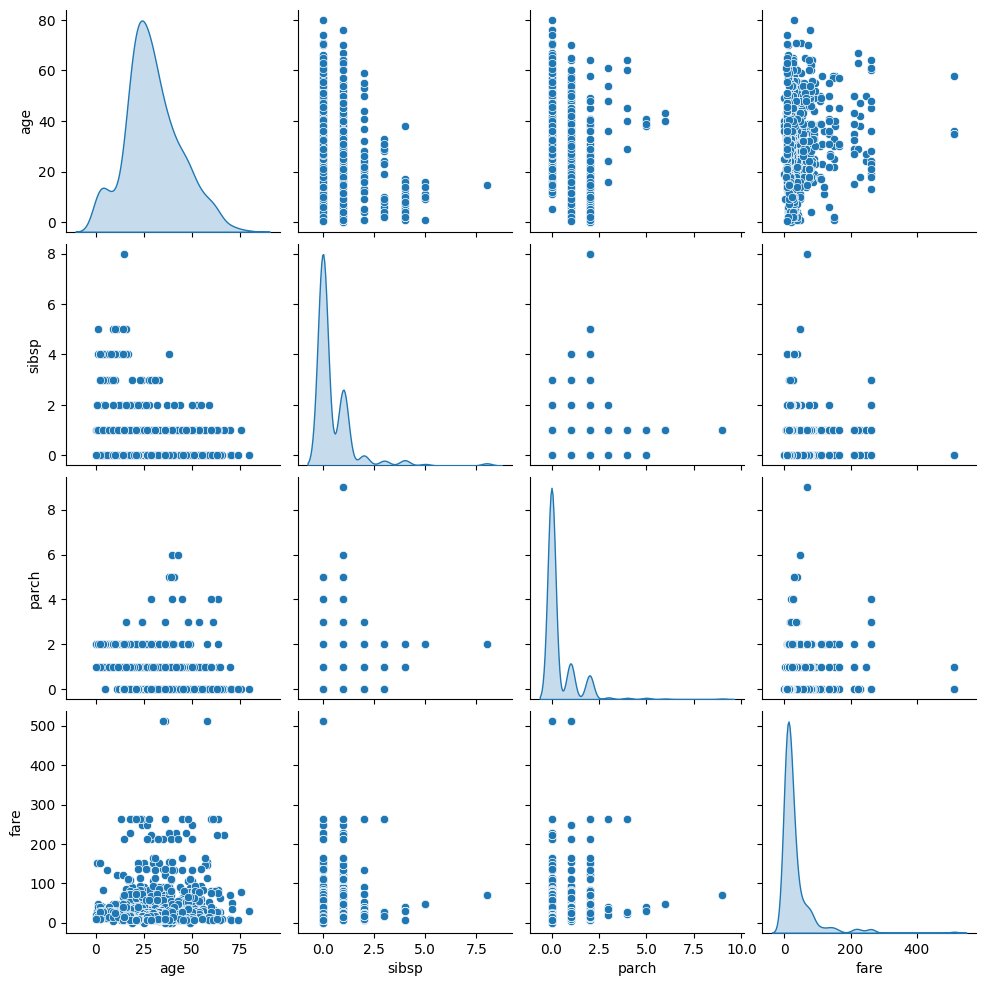

In [47]:
sns.pairplot(titanic_df[numerical_columns], diag_kind="kde");

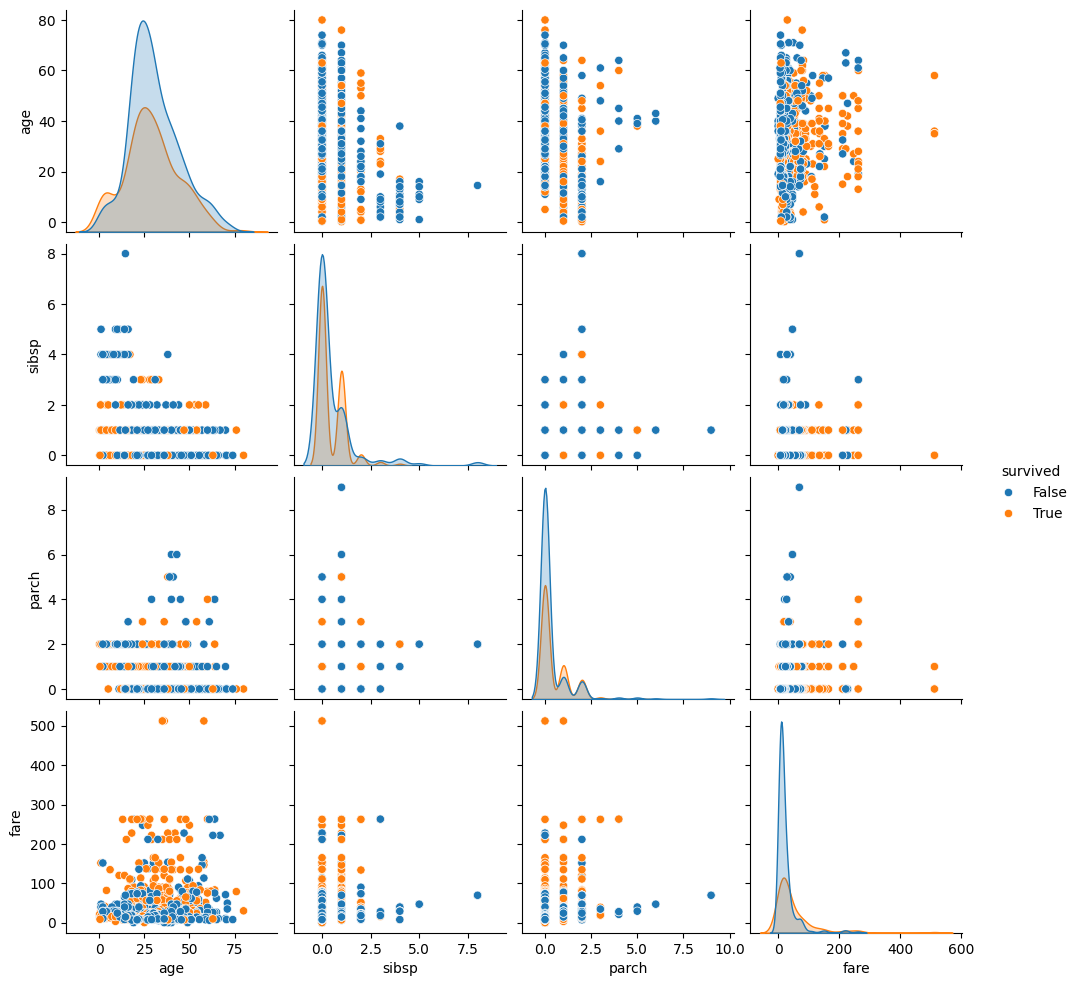

In [48]:
df = titanic_df[[*numerical_columns, "survived"]]

sns.pairplot(df, hue="survived", diag_kind="kde");

### 📏 Heuristics

In [49]:
def calculate_survival_percentage(df, pclass, age_min, age_max=None) -> float:
    """Calculate the percentage of survivors based on the class and age range.

    Args:
        df: DataFrame with the Titanic dataset
        pclass: int with the class of the passenger
        age_min: int with the minimum age of the passenger
        age_max: int with the maximum age of the passenger

    Returns:
        float with the percentage of survivors

    """

    if age_max:
        survivors = len(
            df[
                (df["pclass"] == pclass)
                & (df["age"] > age_min)
                & (df["age"] < age_max)
                & (df["survived"])
            ]
        )
        total = len(
            df[(df["pclass"] == pclass) & (df["age"] > age_min) & (df["age"] < age_max)]
        )
    else:
        survivors = len(
            df[(df["pclass"] == pclass) & (df["age"] > age_min) & (df["survived"])]
        )
        total = len(df[(df["pclass"] == pclass) & (df["age"] > age_min)])

    return round((survivors / total) * 100, 1)


# Calcular y mostrar los porcentajes de supervivencia
print(
    "Pclass 1 survivors above age 60:",
    calculate_survival_percentage(titanic_df, 1, 59),
    "%",
)
print(
    "Pclass 2 survivors above age 60:",
    calculate_survival_percentage(titanic_df, 2, 59),
    "%",
)
print(
    "Pclass 3 survivors above age 60:",
    calculate_survival_percentage(titanic_df, 3, 59),
    "%",
)

print(
    "Pclass 1 survivors between 20-30 age:",
    calculate_survival_percentage(titanic_df, 1, 19, 31),
    "%",
)
print(
    "Pclass 2 survivors between 20-30 age:",
    calculate_survival_percentage(titanic_df, 2, 19, 31),
    "%",
)
print(
    "Pclass 3 survivors between 20-30 age:",
    calculate_survival_percentage(titanic_df, 3, 19, 31),
    "%",
)

Pclass 1 survivors above age 60: 38.5 %
Pclass 2 survivors above age 60: 12.5 %
Pclass 3 survivors above age 60: 16.7 %
Pclass 1 survivors between 20-30 age: 69.8 %
Pclass 2 survivors between 20-30 age: 41.0 %
Pclass 3 survivors between 20-30 age: 25.2 %


## 📊 Analysis of Results and Conclusions 

- Almost all Pclass 1 females survive and so do most of Pclass 2. Pclass 3 female survival is 50% and almost all (86%) Pclass 3 males unfortunately do not survive
- 2nd class passengers had twice the survival rate of 3rd class and 1st class passengers had even better rates
- The fare is highly correlated with the class
- The age is not correlated with the pclass
- The age is not correlated with the fare
- The Survival rate among passengers who embarked in Cherbourg is higher than the others
- The Survival rate among females is higher
- The Survival rate among 1st class passengers is higher
- The Survival rate among age 0-10 is higher
- The two variables that have the highest correlation with the target variable are `sex` and `pclass`

## 💡 Proposals and Ideas




For first baseline model, we will use the following features:
- `sex`
- `pclass`
- `age`

and can be done with heuristics or with a simple model like a decision tree.

## 📖 References

Visualización

- <https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/#visualizacion-con-pandas>
- <https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/plotly/>
- <https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/seaborn/>

EDA
- <https://www.analyticsvidhya.com/blog/2022/02/a-quick-guide-to-bivariate-analysis-in-python/>
- <https://www.kaggle.com/code/allohvk/titanic-advanced-eda>
- <https://www.kaggle.com/code/imkushwaha/bivariate-multivariate-analysis>

Statistical tests

- <https://nathanrosidi.medium.com/commonly-used-statistical-tests-in-data-science-93787568eb36>